In [1]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
train =  pd.read_csv("bike-sharing-demand/train.csv",parse_dates=["datetime"])
test = pd.read_csv("bike-sharing-demand/test.csv",parse_dates=["datetime"])

In [3]:
# font 설정
import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else :
    print('Unknown system... sorry~')

In [4]:
train.head()
#(10886, 12)
#datetime64[ns] : 10의 -9승 초 
# casual + registered = count

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [7]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [8]:
train['datetime']
"""
임의의 날짜 입력-> 자전거 대여수? 예측 모델
2011-01-20 00:00:00 -> 5대(예측) -10(정답)= 5(오차)
""

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-8-1166d803b01f>, line 5)

In [9]:
train['year'] =train['datetime'].dt.year
train['month'] =train['datetime'].dt.month
train['day'] =train['datetime'].dt.day
train['hour'] =train['datetime'].dt.hour
train['minute'] =train['datetime'].dt.minute
train['second'] =train['datetime'].dt.second


In [10]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

   minute  second  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, '초..')]

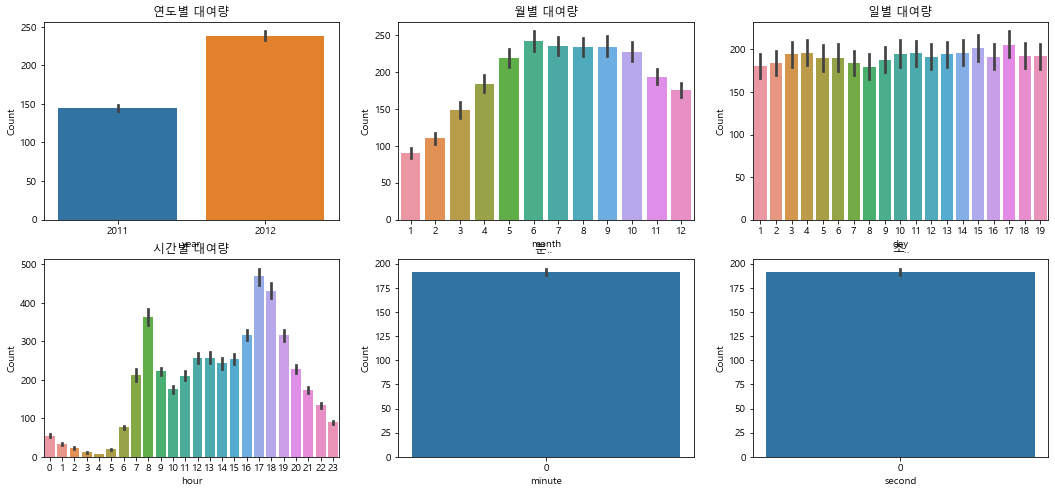

In [11]:
figure, ((ax1, ax2, ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)
sns.barplot(data=train, x = 'year', y='count', ax =ax1)
sns.barplot(data=train, x = 'month', y='count', ax =ax2)
sns.barplot(data=train, x = 'day', y='count', ax =ax3)
sns.barplot(data=train, x = 'hour', y='count', ax =ax4)
sns.barplot(data=train, x = 'minute', y='count', ax =ax5)
sns.barplot(data=train, x = 'second', y='count', ax =ax6)
ax1.set(ylabel="Count", title="연도별 대여량")
ax2.set(ylabel="Count", title="월별 대여량")
ax3.set(ylabel="Count", title="일별 대여량")
ax4.set(ylabel="Count", title="시간별 대여량")
ax5.set(ylabel="Count", title="분.. ")
ax6.set(ylabel="Count", title="초..")

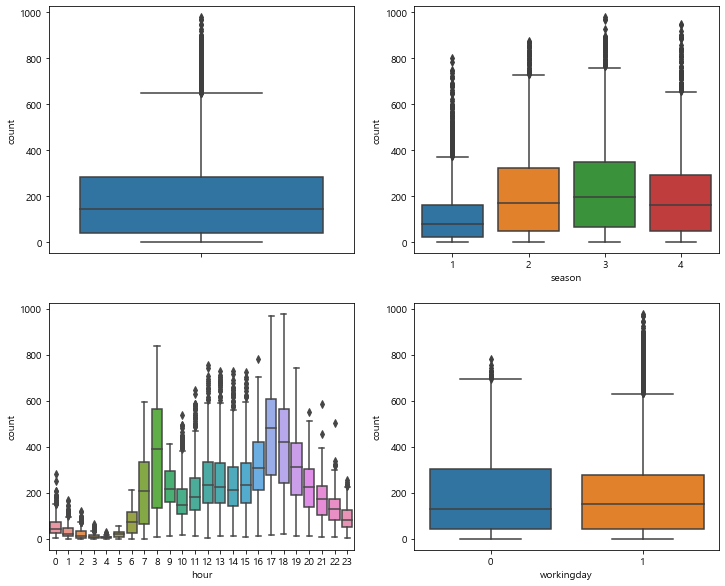

In [12]:
fig,axes=plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=train, y= 'count',orient='v', ax=axes[0][0])
sns.boxplot(data=train, y= 'count',x='season', orient='v', ax=axes[0][1])
sns.boxplot(data=train, y= 'count',x='hour',orient='v', ax=axes[1][0])
sns.boxplot(data=train, y= 'count',x='workingday',orient='v', ax=axes[1][1])

In [13]:
train['dayofweek'] = train.datetime.dt.dayofweek

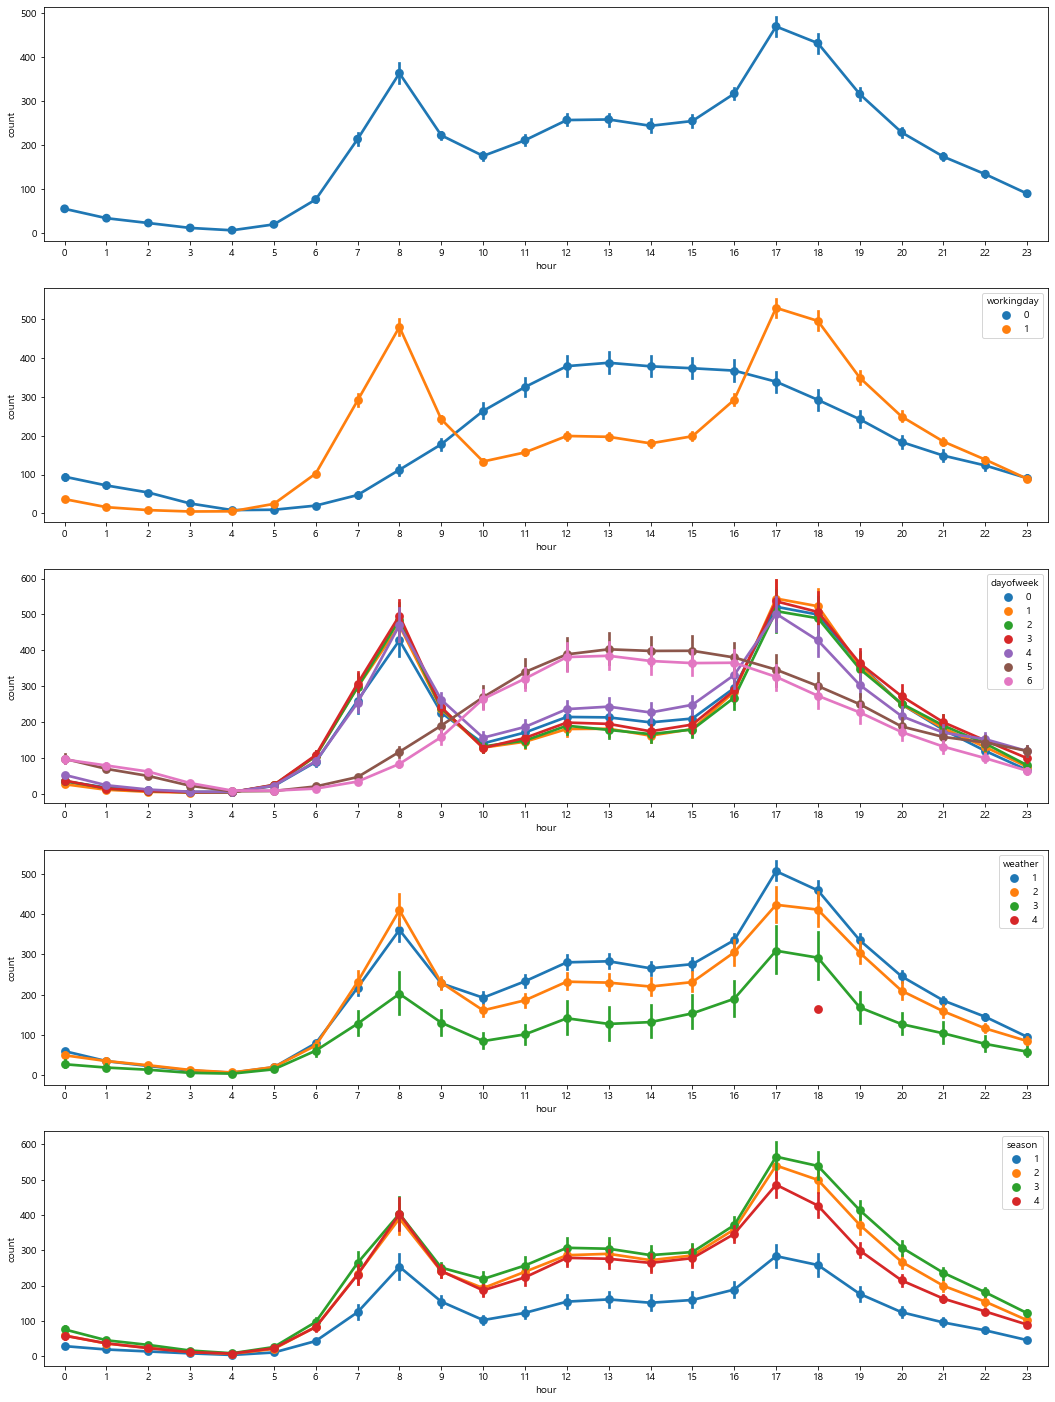

In [14]:
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=5)
fig.set_size_inches(18,25)
sns.pointplot(data=train, y= 'count',x='hour',  ax=ax1)
sns.pointplot(data=train, y= 'count',x='hour',  hue='workingday', ax=ax2)
sns.pointplot(data=train, y= 'count',x='hour',  hue='dayofweek', ax=ax3)
sns.pointplot(data=train, y= 'count',x='hour',  hue='weather', ax=ax4)
sns.pointplot(data=train, y= 'count',x='hour',  hue='season', ax=ax5)

In [15]:
train.columns
corrMatt= train[['temp','atemp', 'casual', 'registered', 'humidity', 'windspeed','count' ]]
corrMatt =corrMatt.corr()
corrMatt

temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000

In [16]:
mask=np.array(corrMatt) #데이터프레임이 어레이 타입으로 바뀜 
mask[np.tril_indices_from(mask)]=False #중복되는 반을 안보이게 하기 위해설정하고 아래에 전달

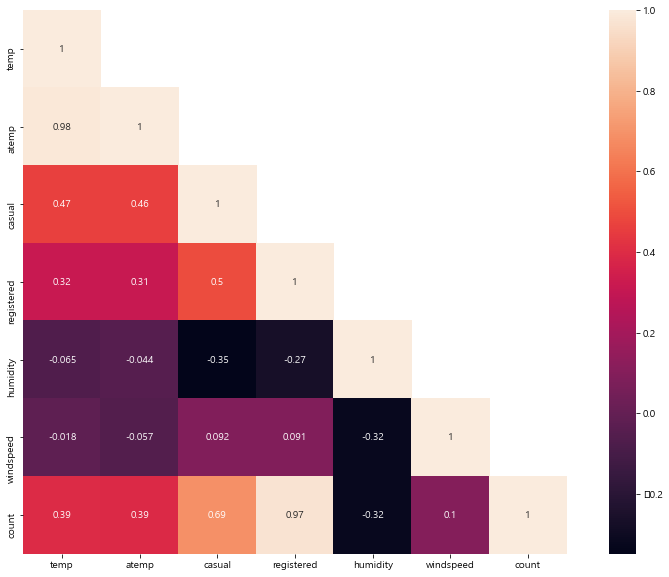

In [17]:
fig, ax=plt.subplots()
fig.set_size_inches(15,10)
sns.heatmap(corrMatt,mask=mask, square=True, annot=True)

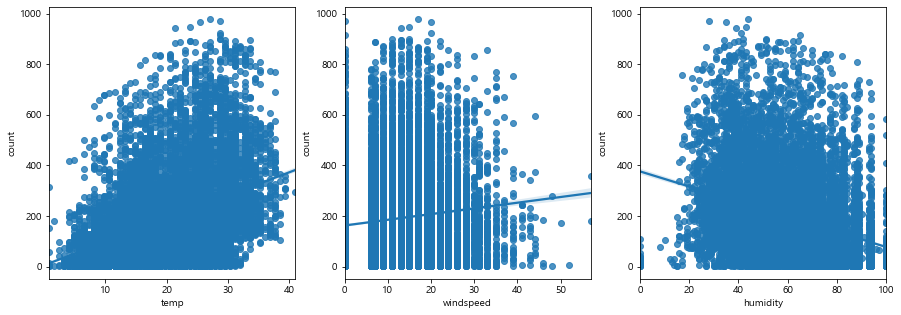

In [18]:
fig, (ax1,ax2,ax3)=plt.subplots(ncols=3)
fig.set_size_inches(15,5)
sns.regplot(x="temp", y="count", data=train, ax=ax1)
sns.regplot(x="windspeed", y="count", data=train, ax=ax2)
sns.regplot(x="humidity", y="count", data=train, ax=ax3)

In [19]:
def myconcat(dtime): #2011-01-01 00:00:00
    
    return "{0}-{1}".format(dtime.year, dtime.month)
#myconcat 함수를 호출할 떄 datetime 컬럼값을 전달, 
#2011-1 와 같이 연도 월을 문자열로 구성하여 리턴 

In [20]:
train['year_month']= train['datetime'].apply(myconcat)

In [21]:
train[['datetime', 'year_month']]

datetime year_month
0     2011-01-01 00:00:00     2011-1
1     2011-01-01 01:00:00     2011-1
2     2011-01-01 02:00:00     2011-1
3     2011-01-01 03:00:00     2011-1
4     2011-01-01 04:00:00     2011-1
...                   ...        ...
10881 2012-12-19 19:00:00    2012-12
10882 2012-12-19 20:00:00    2012-12
10883 2012-12-19 21:00:00    2012-12
10884 2012-12-19 22:00:00    2012-12
10885 2012-12-19 23:00:00    2012-12

[10886 rows x 2 columns]

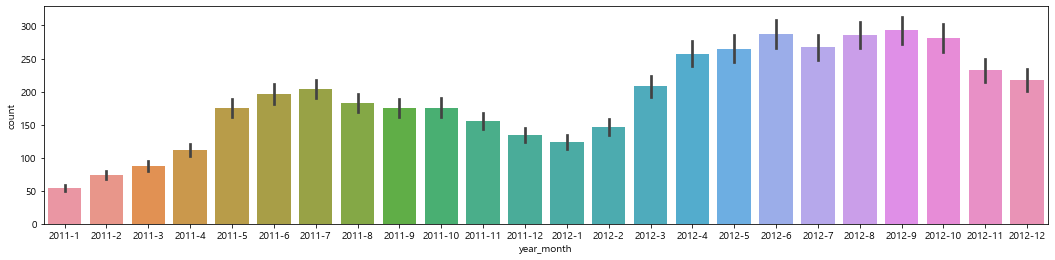

In [22]:
fig, axes=plt.subplots()
fig.set_size_inches(18,4)
sns.barplot(data=train, x= 'year_month', y='count', ax=axes)

In [23]:
train =  pd.read_csv("bike-sharing-demand/train.csv",parse_dates=["datetime"])
test = pd.read_csv("bike-sharing-demand/test.csv",parse_dates=["datetime"])

In [24]:
train.shape #10886, 12
test.shape #6493,9

(6493, 9)

In [25]:
train['year'] =train['datetime'].dt.year
train['month'] =train['datetime'].dt.month
train['hour'] =train['datetime'].dt.hour
train['dayofweek'] =train['datetime'].dt.dayofweek



In [26]:
test['year'] =test['datetime'].dt.year
test['month'] =test['datetime'].dt.month
test['hour'] =test['datetime'].dt.hour
test['dayofweek'] =test['datetime'].dt.dayofweek


In [27]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'hour', 'dayofweek'],
      dtype='object')

https://programmers.co.kr/learn/courses/21/lessons/944

In [32]:
#windspeed
trainWind0 = train.loc[train['windspeed']==0]
trainWind1 = train.loc[train['windspeed']!= 0]

In [33]:
from sklearn.ensemble import RandomForestClassifier
#풍속을 머신러닝해서 채워줌
def predict_windspeed(data):
    dataWind0 =data.loc[train['windspeed']==0]
    dataWind1 =data.loc[train['windspeed']!=0]
    #예측을 위한 변수
    wCol = ['season', 'weather','humidity', 'month', 'temp','year','atemp']
    #풍속이 0이 아닌 데이터 타입을 스트링으로 
    dataWind1['windspeed'] = dataWind1['windspeed'].astype("str")
    #모델에 풍속이 0이 아닌 데이터들로 학습
    rfmodel_wind = RandomForestClassifier()
    rfmodel_wind.fit(dataWind1[wCol], dataWind1['windspeed'])
    #예측
    wind0values = rfmodel_wind.predict(X=dataWind0[wCol])
    #비교 
    predictWind0=dataWind0
    predictWind1 = dataWind1

    predictWind0['windspeed'] = wind0values

    data = predictWind1.append(predictWind0)
    #풍속 데이터 타입 변경
    data['windspeed']=data['windspeed'].astype("float")

    data.reset_index(inplace = True)
    data.drop('index', inplace=True, axis=1)
    
    return data

In [36]:
train = predict_windspeed(train)

ValueError: Found array with 0 sample(s) (shape=(0, 7)) while a minimum of 1 is required.

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
# rfModel = RandomForestRegressor()
# rfModel.fit(xdata, label)
# rfModel.predict(xtest)